In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [3]:
data.shape

(230596, 7)

In [4]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [5]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [6]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


In [7]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [8]:
data.nunique

<bound method DataFrame.nunique of               Date Timestamp   Account No       Balance   Amount  \
0       01/01/2023     00:00  678330503.0   2971.000000  1584.00   
1       01/01/2023     00:00  472213568.0   3792.000000  1950.00   
2       01/01/2023     00:00  472213568.0   3012.000000  -780.00   
3       01/01/2023     00:00  283027736.0   1787.000000   780.00   
4       01/01/2023     00:00  624500124.0   3226.000000  1825.00   
...            ...       ...          ...           ...      ...   
230591  06/12/2023     20:54  581655972.0  45935.206861   -41.06   
230592  06/12/2023     20:55  786141370.0   -244.837500   -62.35   
230593  06/12/2023     21:05  824916823.0   9709.172159   -32.94   
230594  06/12/2023     21:13  366550080.0  26834.165794   -19.25   
230595  06/12/2023     21:32  259015404.0   1145.349837   -37.64   

        Third Party Account No    Third Party Name  
0                          NaN  Westport Care Home  
1                          NaN    Barbiee 

In [9]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [10]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [11]:
# Grouping the dataset by 'Account No' and counting the number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

# Converting the series to a DataFrame for better readability
transactions_per_user_df = transactions_per_user.reset_index(name='Number of Transactions')

# Displaying the first few rows to verify
transactions_per_user_df.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [12]:
# finding average number of transactions of all users
average_transactions_per_user = transactions_per_user.mean()

average_transactions_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [13]:
# Generate a unique account number
# Assuming account numbers are numeric, we'll find a number not present in the current dataset

existing_account_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_account_number = int(max(existing_account_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_account_number, inplace=True)

# Verify that there are no longer null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_account_number, verification_result

(999752673, 0)

In [14]:
data.isnull().sum() ## no missing values found in account number

Date                         229
Timestamp                    251
Account No                     0
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [15]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [16]:
# Fill missing values in 'Third Party Identifier' with values from 'Third Party Name'
data['Third Party'] = data['Third Party Name']

# Fill remaining missing values in 'Third Party Identifier' with values from 'Third Party Account No'
data.loc[data['Third Party'].isnull(), 'Third Party'] = data['Third Party Account No']

# Convert 'Third Party Identifier' column to string type
data['Third Party'] = data['Third Party'].astype(str)

# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)


In [17]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party      0
dtype: int64

In [18]:
data['Account No'].nunique() ## total no.of users

977

1. Date and Timestamp
Method Used: Forward Fill
Why?
Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time series data.
Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.
2. Balance and Amount
Method Used: Linear Interpolation
Why?
Balance and Amount are continuous numerical values that often follow a linear trend between successive data points, especially in financial records where balances and transaction amounts can change in a predictable manner over short intervals.
Linear interpolation provides a way to estimate missing values based on a straight-line connection between available data points. This is particularly suitable for financial data where incremental changes are expected between observations.
This method helps in maintaining a realistic progression of values, reflecting typical financial transactions and balance adjustments.

In [19]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

# Interpolate missing values for Balance and Amount
data['Balance'] = data['Balance'].interpolate(method='linear')
data['Amount'] = data['Amount'].interpolate(method='linear')
# Check for remaining missing values
print(data.isnull().sum())


Date           0
Timestamp      0
Account No     0
Balance        0
Amount         0
Third Party    0
dtype: int64


In [20]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [21]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

In [22]:
# Convert the 'not_happened_yet_date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

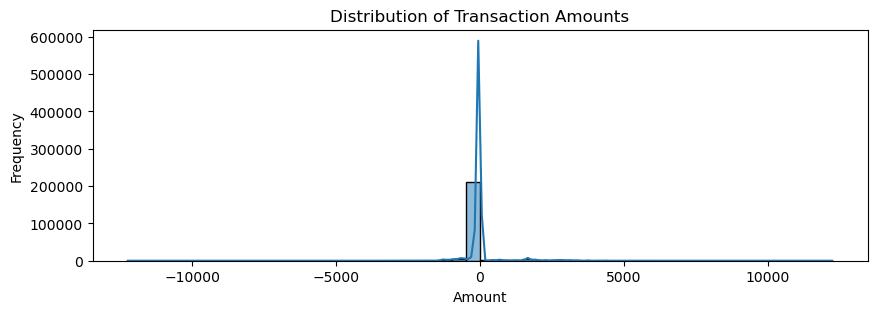

In [23]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(10, 3))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

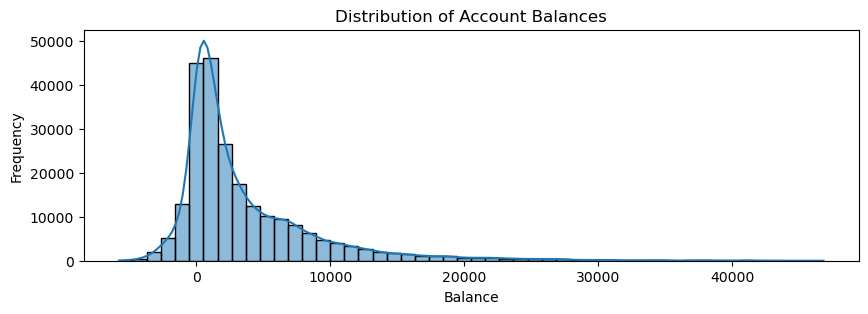

In [24]:
# Plot the distribution of account balances
plt.figure(figsize=(10,3))
sns.histplot(data['Balance'], bins=50, kde=True)
plt.title('Distribution of Account Balances')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

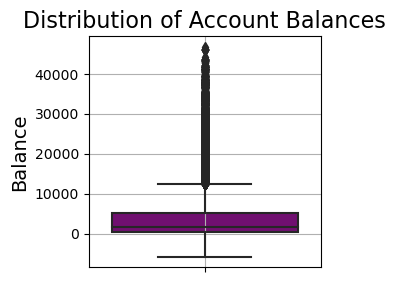

In [25]:
plt.figure(figsize=(3,3))
sns.boxplot(y=data['Balance'], color='purple')
plt.title('Distribution of Account Balances', fontsize=16)
plt.ylabel('Balance', fontsize=14)
plt.grid(True)
plt.show()

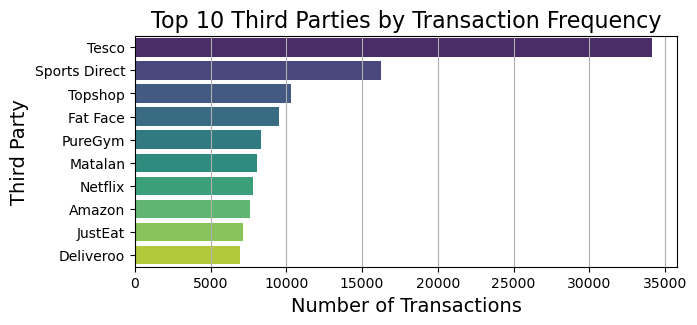

In [26]:
top_parties = data['Third Party'].value_counts().head(10)

plt.figure(figsize=(7,3))
sns.barplot(x=top_parties.values, y=top_parties.index, palette='viridis')
plt.title('Top 10 Third Parties by Transaction Frequency', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Third Party', fontsize=14)
plt.grid(True, axis='x')
plt.show()

In [27]:
# Extract day of the week and hour from the 'Date' and 'Timestamp'
data['Day of Week'] = data['Date'].dt.day_name()
#data['Hour'] = pd.to_datetime(data['Timestamp'], format='%H:%M').dt.hour

# Create a binary feature for transaction direction
data['Transaction Direction'] = np.where(data['Amount'] >= 0, 'Credit', 'Debit')

# Display the updated DataFrame
data[['Date', 'Timestamp', 'Day of Week', 'Transaction Direction']].head()

,Date,Timestamp,Day of Week,Transaction Direction
0,2023-01-01,00:00,Sunday,Credit
1,2023-01-01,00:00,Sunday,Credit
2,2023-01-01,00:00,Sunday,Debit
3,2023-01-01,00:00,Sunday,Credit
4,2023-01-01,00:00,Sunday,Credit


## Transactions that are several standard deviations away from the mean might be considered suspicious:
- Transactions that are several standard deviations away from the mean might be considered suspicious:

In [28]:
# Calculate the mean and standard deviation
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()

# Identify outliers as transactions that are more than 3 standard deviations from the mean
outliers = data[np.abs(data['Amount'] - mean_amount) > 3 * std_amount]

# Display outliers
outliers[['Date', 'Amount', 'Account No', 'Third Party', 'Transaction Direction']]

,Date,Amount,Account No,Third Party,Transaction Direction
0,2023-01-01,1584,678330503,Westport Care Home,Credit
1,2023-01-01,1950,472213568,Barbiee Boutique,Credit
4,2023-01-01,1825,624500124,Fat Face,Credit
5,2023-01-01,2842,203466392,Lavender Primary,Credit
6,2023-01-01,1950,768271776,A Cut Above,Credit
...,...,...,...,...,...
222503,2023-11-30,2110,514362267,124125096,Credit
222504,2023-12-01,1695,497809732,Fitted Stitch,Credit
222505,2023-12-01,1675,899692478,A Yarn Story,Credit
222508,2023-12-01,1675,370757362,Craftastic,Credit


## transactions occurring repeatedly at the same time to the same third party, which could indicate automated or scripted fraud:
- more than 5 times

In [29]:
# Group by account number, third party, and hour to see repetitive patterns
repetitive_patterns = data.groupby(['Account No', 'Third Party', 'Timestamp']).size().reset_index(name='Count')

# Filter for patterns that occur more than a threshold, e.g., more than 5 times
suspicious_patterns = repetitive_patterns[repetitive_patterns['Count'] > 5]

# Display suspicious repetitive patterns
suspicious_patterns


,Account No,Third Party,Timestamp,Count
6,101531259,Disney,23:59,11
29,101531259,Grand Union BJJ,23:59,11
31,101531259,Hobbycraft,00:00,11
34,101531259,LBG,00:00,12
80,104832000,587923845,23:59,11
...,...,...,...,...
166744,999752672,Halifax,00:00,12
166771,999752672,Netflix,23:59,11
166899,999752673,Blizzard,23:59,6
166977,999752673,Netflix,23:59,7


## Visualisations

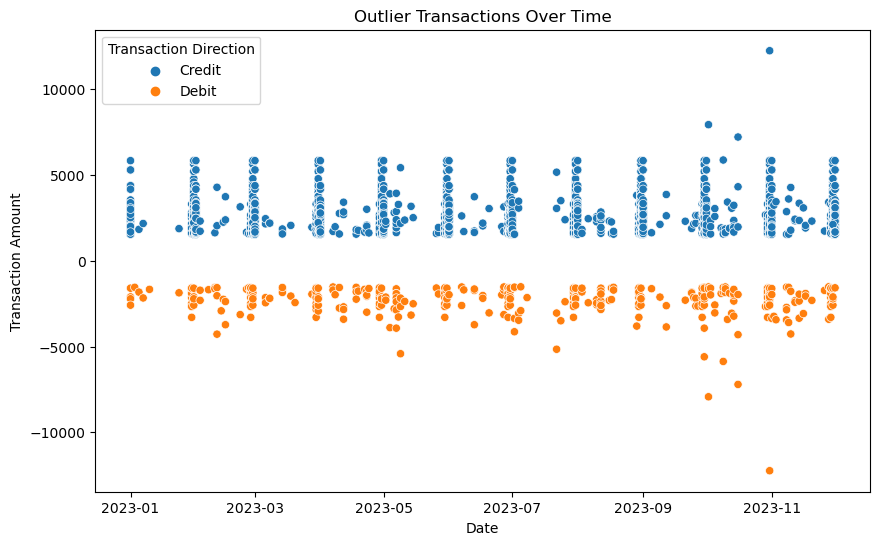

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', data=outliers)
plt.title('Outlier Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

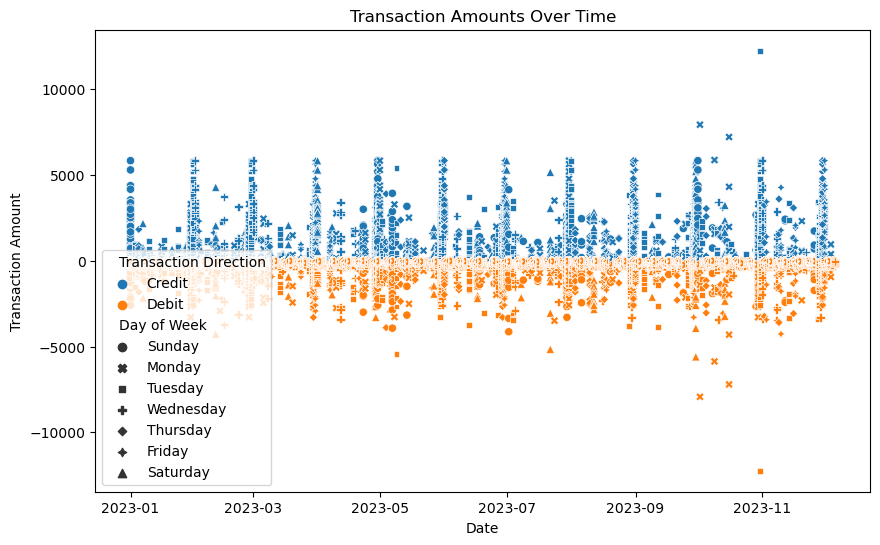

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', style='Day of Week', data=data)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


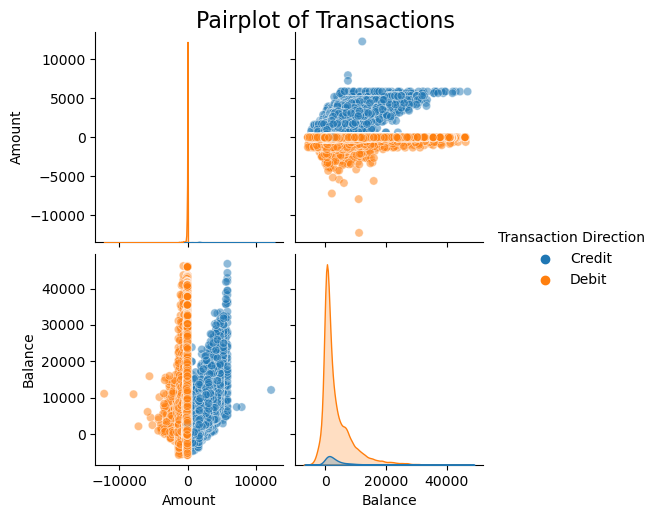

In [32]:
# Create pairplot for selected columns to visualize relationships and distributions
sns.pairplot(data[['Amount', 'Balance', 'Transaction Direction']], hue='Transaction Direction', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Transactions', size=16, y=1.02)
plt.show()

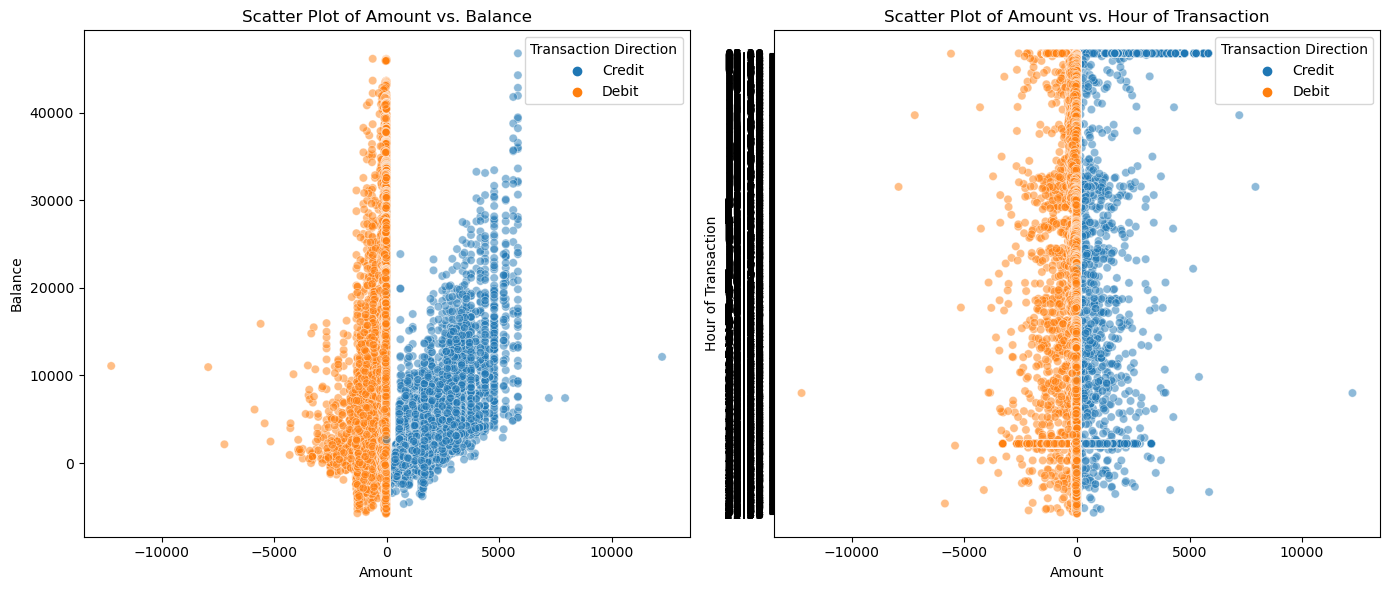

In [39]:
# Create individual scatter plots instead of a pairplot to avoid issues with KDE and non-numeric data types
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of Amount vs. Balance
sns.scatterplot(x='Amount', y='Balance', hue='Transaction Direction', data=data, ax=axs[0], alpha=0.5)
axs[0].set_title('Scatter Plot of Amount vs. Balance')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Balance')

# Scatter plot of Amount vs. Hour of Transaction
sns.scatterplot(x='Amount', y='Timestamp', hue='Transaction Direction', data=data, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter Plot of Amount vs. Hour of Transaction')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Hour of Transaction')

plt.tight_layout()
plt.show()

## Monthly Banking Activity: Insights from Total Spent, Total Credited, and Transaction Count

In [34]:

# Using 'Grouper' to group by month directly

monthly_data = data.groupby(['Account No', pd.Grouper(key='Date', freq='M')]).agg(
    Total_Spent=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x < 0].sum()),
    Total_Credited=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x >= 0].sum()),
    Transaction_Count=pd.NamedAgg(column='Amount', aggfunc='count')
).reset_index()

# Converting 'Date' to 'Year-Month' format for easier reading
monthly_data['Date'] = monthly_data['Date'].dt.to_period('M')

# Display the first few rows of the modified monthly statistics
monthly_data.head(5)


,Account No,Date,Total_Spent,Total_Credited,Transaction_Count
0,101531259,2023-01,-2240,1542,18
1,101531259,2023-02,-1280,1542,8
2,101531259,2023-03,-1146,1542,8
3,101531259,2023-04,-1410,1542,10
4,101531259,2023-05,-1369,1542,9


In [35]:
monthly_data.shape

(11626, 5)

In [36]:
data['Account No'].unique().shape

(977,)

## checking all the users spending evry month or not

In [40]:
# To ensure each account's activity is accounted for in every expected month of the dataset, 
# we'll check which months each account has transactions and list any missing months.

# First, get the full range of months from the dataset
full_date_range = pd.period_range(data['Date'].min(), data['Date'].max(), freq='M')

# Dictionary to store missing months for each account
missing_months_dict = {}

# Iterating over each account
for account, group in data.groupby('Account No'):
    present_months = group['Date'].dt.to_period('M').unique()
    missing_months = full_date_range[~full_date_range.isin(present_months)]
    if len(missing_months) > 0:
        missing_months_dict[account] = missing_months

# Create a list to store tuples of account number and missing month
missing_months_list = []

# Iterate over the dictionary and append tuples to the list
for account, missing_months in missing_months_dict.items():
    for month in missing_months:
        missing_months_list.append((account, month))

# Create a DataFrame from the list
missing_months_df = pd.DataFrame(missing_months_list, columns=['Account No', 'Missing Month'])

# Display the DataFrame
print(missing_months_df)


    Account No Missing Month
0    124377686       2023-12
1    126929801       2023-12
2    132400709       2023-12
3    143383029       2023-12
4    143606916       2023-12
..         ...           ...
93   952921898       2023-12
94   964913066       2023-12
95   969804197       2023-12
96   989506909       2023-12
97   998405607       2023-12

[98 rows x 2 columns]


## fraud detection using transactional data